In [1]:
# %reset
# python module needed
# = import modules ============================= #
# import netCDF4 as nc # read and write netcdf files
from os.path import exists # check if file exists
import matplotlib as mpl # plots
import matplotlib.pyplot as plt # interactive plots
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import numpy as np # arrays
import xarray as xr
import datetime
# =============================================== #
# define the figure size
plt.rcParams['figure.figsize'] = [9.,6.]

In [2]:
# read grid variables with xarray
grid = xr.open_dataset('./in/grid_1x1.nc4')

In [4]:
# longitude axis
lon1d = grid['lon'] 
# latitude axis
lat1d = grid['lat']
# grid cell area
area2d = grid['area']

lon2d, lat2d = np.meshgrid(lon1d,lat1d)

In [7]:
import seaborn as sns
sns.set()

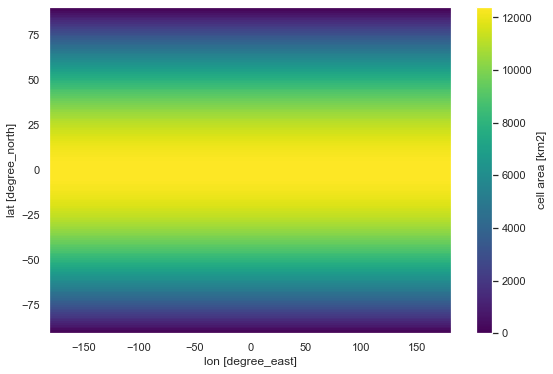

In [8]:
area2d.plot()

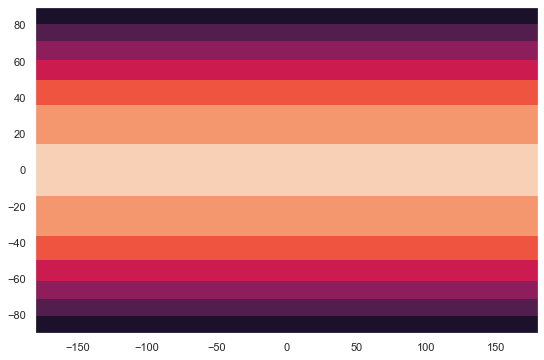

In [9]:
# make a first map
plt.contourf(lon1d, lat1d, area2d)

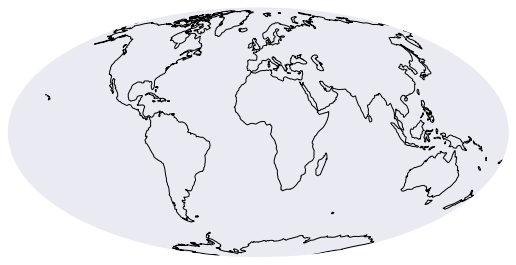

In [10]:
# plot a map with a nice projection using cartopy #
# =============================================== #
# indicate the Coordinate Reference System (crs) of your input data
data_crs = ccrs.PlateCarree()
# choose a projection
# e.g. a global equal-area projection: Mollweide (https://matplotlib.org/basemap/users/moll.html)
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()

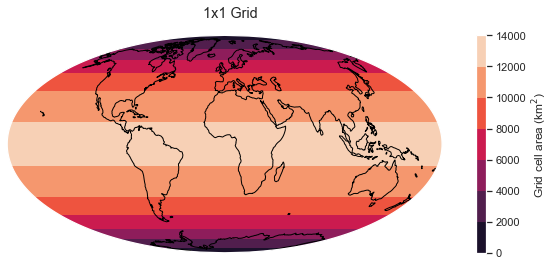

In [11]:
# test this projection
fig = plt.figure(figsize=(12,4))
ax = plt.axes(projection=ccrs.Mollweide())
plt.contourf(lon1d, lat1d, area2d, transform=data_crs)
plt.colorbar(label='Grid cell area (km$^{2}$)')
ax.coastlines()
title = fig.suptitle('1x1 Grid')

In [12]:
area2d.max()a visualização destes dados 

<xarray.DataArray 'area' ()>
array(12391.872, dtype=float32)

In [13]:
# define a shade function
def shade(var2d, var_name='', units='', title='', vmin=None, vmax=None, delta=None, cmap=None, extend='both'):
    fig = plt.figure(figsize=(12,4))
    ax = plt.axes(projection=ccrs.Mollweide())
    ax.set_global() # to show the whole Earth
    # define the colorbar
    vmin = var2d.min() if vmin is None else vmin
    vmax = var2d.max() if vmax is None else vmax
    nt = 11 if delta is None else int((vmax - vmin) / delta) + 1
    bounds = np.linspace(vmin, vmax, nt)
    # plot
    plt.contourf(lon1d, lat1d, var2d, bounds, vmin=vmin, vmax=vmax, extend=extend, cmap=cmap, transform=data_crs)
    plt.colorbar(label=var_name+' ('+units+')')
    ax.coastlines()
    fig.suptitle(title)

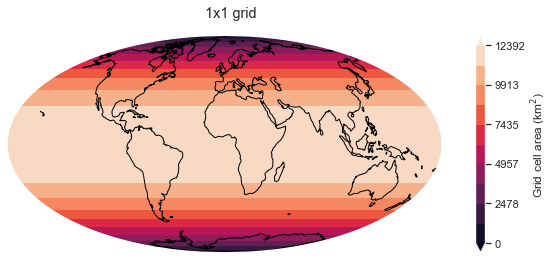

In [14]:
# test the shade function
shade(area2d, var_name='Grid cell area', units='km$^{2}$', title='1x1 grid')

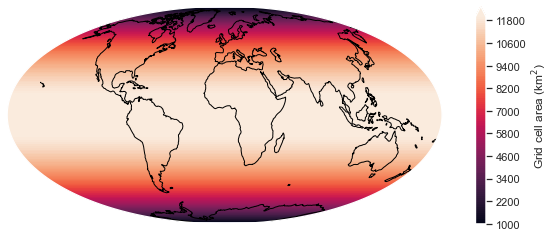

In [15]:
# choose nice bounds for your colorbar
shade(area2d, var_name='Grid cell area', units='km$^{2}$', vmin= 1000, vmax = 12000, delta= 100, extend='max')

In [16]:
lat1d

<xarray.DataArray 'lat' (lat: 181)>
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80., -79.,
       -78., -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67.,
       -66., -65., -64., -63., -62., -61., -60., -59., -58., -57., -56., -55.,
       -54., -53., -52., -51., -50., -49., -48., -47., -46., -45., -44., -43.,
       -42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
         6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:    degree_north

In [17]:
# example for Antarctica
region2d = (lat2d>=50)
reg_name = 'Antarctica'
# mask area2d outside of region2d
marea2d = area2d.where(region2d)

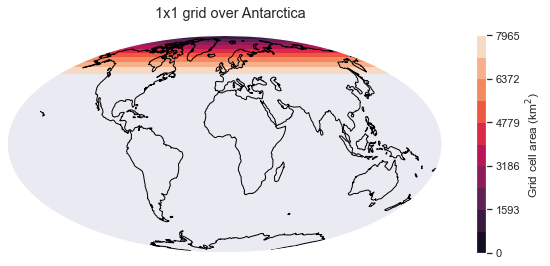

In [18]:
# verify your region
shade(marea2d, var_name='Grid cell area', units='km$^2$', title='1x1 grid over '+reg_name, extend='neither')

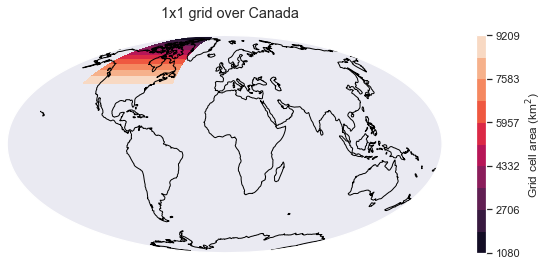

In [19]:
# here your own region
region2d = (lat2d>=42) & (lat2d<=85) & (lon2d>=-141) & (lon2d<=-52)
reg_name = 'Canada'
marea2d = area2d.where(region2d)
# test
shade(marea2d, var_name='Grid cell area', units='km$^2$', title='1x1 grid over '+reg_name, extend='neither')

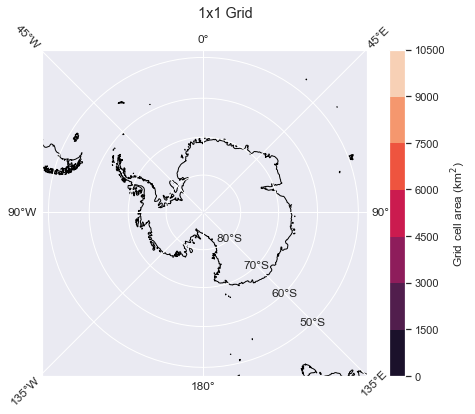

In [20]:
fig = plt.figure(figsize=(8,6))
# define a new projection for your region.
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -48], crs=data_crs)
# test this projection
plt.contourf(lon1d, lat1d, marea2d, transform=data_crs)
plt.colorbar(label='Grid cell area (km$^{2}$)')
ax.coastlines(resolution='50m')
ax.gridlines(xlocs=np.linspace(-180, 180, 9), ylocs=np.linspace(-80, -50, 4), draw_labels=True, crs=data_crs)
title = fig.suptitle('1x1 Grid')

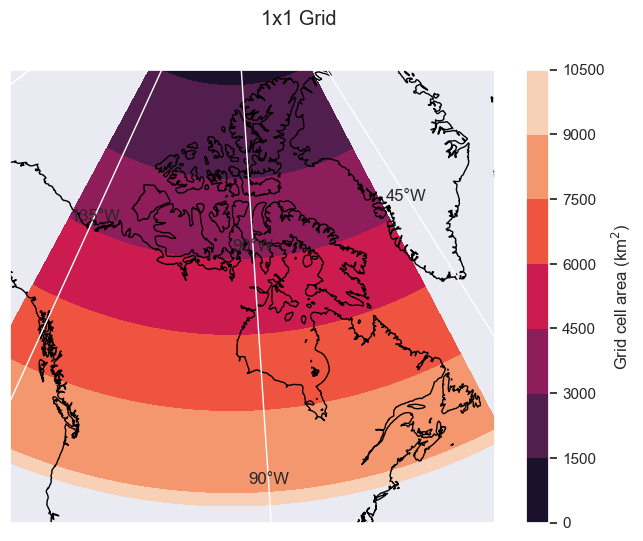

In [21]:
fig = plt.figure(figsize=(8,6), dpi = 100)
# define a new projection for your region.
#ax = plt.axes(projection= 
#ax.set_extent(...
# test this projection

              
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-130, -55, 40, 83], crs=data_crs)
# test this projection
plt.contourf(lon1d, lat1d, marea2d, transform=data_crs)
plt.colorbar(label='Grid cell area (km$^{2}$)')
ax.coastlines(resolution='50m')
ax.gridlines(xlocs=np.linspace(-180, 180, 9), ylocs=np.linspace(-80, -50, 4), draw_labels=True, crs=data_crs)
title = fig.suptitle('1x1 Grid')

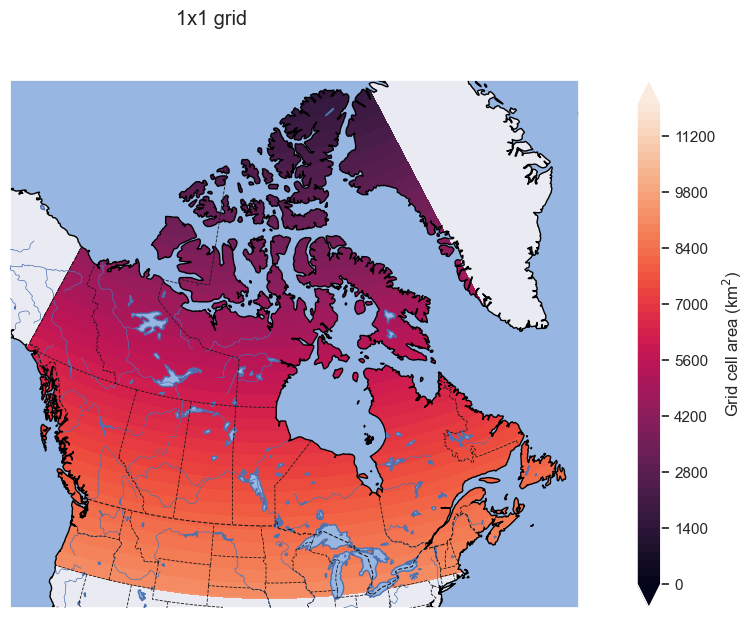

In [22]:
def shade(var2d, var_name='', units='', title='', vmin=None, vmax=None, delta=None, cmap=None, extend='both'):
    
    fig = plt.figure(figsize=(15,7), dpi = 100)
    ax = plt.axes(projection=ccrs.LambertConformal())
    ax.set_global() # to show the whole Earth
    # define the colorbar
    vmin = var2d.min() if vmin is None else vmin
    vmax = var2d.max() if vmax is None else vmax
    nt = 11 if delta is None else int((vmax - vmin) / delta) + 1
    bounds = np.linspace(vmin, vmax, nt)
    # data resolution
    resol = '50m'

    # country boundaries
    country_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
        name='admin_0_boundary_lines_land', scale=resol, facecolor='none', edgecolor='k')

    # province boundaries
    provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
        name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')

    # land areas
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
        scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])

    # Ocean/seas
    ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
        scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])

    # Lakes
    lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
        scale=resol, edgecolor='b', facecolor=cfeature.COLORS['water'])

    # Rivers
    rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
        scale=resol, edgecolor='b', facecolor='none')

    # Add all features to the map 
    #ax.add_feature(land, facecolor='beige', zorder=4)
    ax.add_feature(ocean, linewidth=0.2 )
    ax.add_feature(lakes, zorder=5)
    ax.add_feature(rivers, linewidth=0.5, zorder=6)

    ax.add_feature(country_bodr, linestyle='--', linewidth=0.8, edgecolor="k", zorder=10)  #USA/Canada
    ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

    # plot
    ax.set_extent([-130, -55, 41, 83], crs=data_crs)
    plt.contourf(lon1d, lat1d, var2d, bounds, vmin=vmin, vmax=vmax, extend=extend, cmap=cmap, transform=data_crs)
    plt.colorbar(label=var_name+' ('+units+')')
    ax.coastlines()
    fig.suptitle(title)

# test your new shade function
shade(marea2d, var_name='Grid cell area', units='km$^{2}$', title='1x1 grid', vmin = 0, vmax = 12000, delta = 200 )

In [23]:
# select your variable and your list of GCMs
var_name = 'tas' # 'pr' or 'tas' or 'zos' or 'tos' or 'sic'
season = 'annual' # 'annual' or 'DJF' or 'JJA'
gcm = 'ACCESS1-3' # 'ACCESS1-3' or 'NorESM1-M' or GFDL-CM3' or 'CCSM4'
# for 'zos' : 'GFDL-CM3' or 'NorESM1-M' and between 20°S and 20°N
# ========

In [24]:
# define the name of the file
file_in = './in/' + var_name + '/' + season + '/' + var_name + '_' + gcm + '_histo-rcp85_r1i1p1_1x1_' + season + '.nc4'

In [25]:
# read var
var3d = xr.open_dataset(file_in)[var_name]
# remove NaN
var3d = var3d.where(var3d < 9999.)
var3d = var3d.where(var3d > -9999.)

In [26]:
# check what's in var3d
var3d

<xarray.DataArray 'tas' (time: 251, lat: 181, lon: 361)>
array([[[222.29558716, 222.29558716, 222.29558716, ..., 222.29558716,
         222.29558716, 222.29558716],
        [224.53454103, 224.5482547 , 224.56259147, ..., 224.51354559,
         224.52386957, 224.53454103],
        [230.45403598, 230.53085647, 230.60850133, ..., 230.31501699,
         230.38413352, 230.45403598],
        ...,
        [253.41139462, 253.41484044, 253.41828473, ..., 253.40232546,
         253.4067976 , 253.41139462],
        [253.49365344, 253.49447455, 253.49536514, ..., 253.48950024,
         253.4915617 , 253.49365344],
        [253.43979572, 253.43979572, 253.43979572, ..., 253.43979572,
         253.43979572, 253.43979572]],

       [[222.39541032, 222.39541032, 222.39541032, ..., 222.39541032,
         222.39541032, 222.39541032],
        [224.32502789, 224.33760828, 224.35055904, ..., 224.31341495,
         224.31890439, 224.32502789],
        [229.77921158, 229.85075977, 229.92295257, ..., 229.65563861,
         229.7169202 , 229.77921158],
...
        [271.2632097 , 271.25808348, 271.25300155, ..., 271.27508819,
         271.26926271, 271.2632097 ],
        [271.18892969, 271.18601759, 271.18311504, ..., 271.19811765,
         271.19362369, 271.18892969],
        [270.98362368, 270.98362368, 270.98362368, ..., 270.98362368,
         270.98362368, 270.98362368]],

       [[229.5302081 , 229.5302081 , 229.5302081 , ..., 229.5302081 ,
         229.5302081 , 229.5302081 ],
        [230.83825039, 230.85218992, 230.86674467, ..., 230.81977203,
         230.82877404, 230.83825039],
        [235.49550015, 235.56142595, 235.62808683, ..., 235.37462376,
         235.43460297, 235.49550015],
        ...,
        [271.32821271, 271.3231237 , 271.317916  , ..., 271.33857352,
         271.3334219 , 271.32821271],
        [271.35414307, 271.35160076, 271.3487626 , ..., 271.36371437,
         271.35899466, 271.35414307],
        [271.27701249, 271.27701249, 271.27701249, ..., 271.27701249,
         271.27701249, 271.27701249]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-07-01T06:00:00 ... 2100-07-01T06:00:00
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    history:  From tas_Amon_ACCESS1-3_historical_r1i1p1.nc4

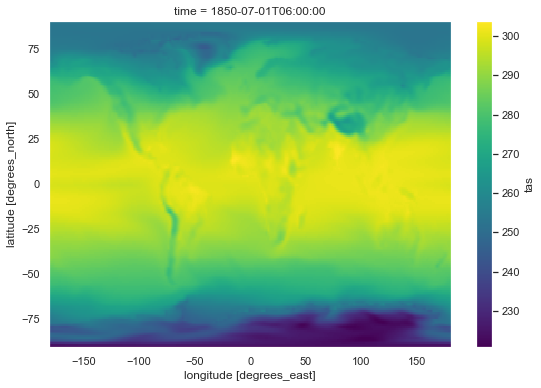

In [27]:
# have a quick look of the first time step of var3d
var3d[0].plot()

In [28]:
# Variables readable names and units
name = {'pr': 'precipitation',
        'tas': 'surface air temperature',
        'tos': 'surface ocean temperature',
        'zos': 'sea level above Geoid',
        'sic': 'sea ice cover'}
units = {'pr': 'kg m$^{-2}$ yr$^{-1}$',
         'tas': 'C',
         'zos': 'm',
         'tos': 'C',
         'sic': '%'}

In [29]:
# convert your variable into the readable unit given above
if var_name == 'pr':
    # kg m-2 s-1 -> kg m-2 yr-1
    var3d = var3d * 3600 * 24 * 365.25 
elif var_name == 'tas':
    # K -> degC
    var3d = var3d - 273.15 
elif var_name == 'tos':
    # K -> degC
    var3d = var3d - 273.15 

In [30]:
# change the unit of your variable
var3d.attrs["units"] = units[var_name]

In [31]:
# check the new unit in your variable
var3d

<xarray.DataArray 'tas' (time: 251, lat: 181, lon: 361)>
array([[[-50.85441284, -50.85441284, -50.85441284, ..., -50.85441284,
         -50.85441284, -50.85441284],
        [-48.61545897, -48.6017453 , -48.58740853, ..., -48.63645441,
         -48.62613043, -48.61545897],
        [-42.69596402, -42.61914353, -42.54149867, ..., -42.83498301,
         -42.76586648, -42.69596402],
        ...,
        [-19.73860538, -19.73515956, -19.73171527, ..., -19.74767454,
         -19.7432024 , -19.73860538],
        [-19.65634656, -19.65552545, -19.65463486, ..., -19.66049976,
         -19.6584383 , -19.65634656],
        [-19.71020428, -19.71020428, -19.71020428, ..., -19.71020428,
         -19.71020428, -19.71020428]],

       [[-50.75458968, -50.75458968, -50.75458968, ..., -50.75458968,
         -50.75458968, -50.75458968],
        [-48.82497211, -48.81239172, -48.79944096, ..., -48.83658505,
         -48.83109561, -48.82497211],
        [-43.37078842, -43.29924023, -43.22704743, ..., -43.49436139,
         -43.4330798 , -43.37078842],
...
        [ -1.8867903 ,  -1.89191652,  -1.89699845, ...,  -1.87491181,
          -1.88073729,  -1.8867903 ],
        [ -1.96107031,  -1.96398241,  -1.96688496, ...,  -1.95188235,
          -1.95637631,  -1.96107031],
        [ -2.16637632,  -2.16637632,  -2.16637632, ...,  -2.16637632,
          -2.16637632,  -2.16637632]],

       [[-43.6197919 , -43.6197919 , -43.6197919 , ..., -43.6197919 ,
         -43.6197919 , -43.6197919 ],
        [-42.31174961, -42.29781008, -42.28325533, ..., -42.33022797,
         -42.32122596, -42.31174961],
        [-37.65449985, -37.58857405, -37.52191317, ..., -37.77537624,
         -37.71539703, -37.65449985],
        ...,
        [ -1.82178729,  -1.8268763 ,  -1.832084  , ...,  -1.81142648,
          -1.8165781 ,  -1.82178729],
        [ -1.79585693,  -1.79839924,  -1.8012374 , ...,  -1.78628563,
          -1.79100534,  -1.79585693],
        [ -1.87298751,  -1.87298751,  -1.87298751, ...,  -1.87298751,
          -1.87298751,  -1.87298751]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-07-01T06:00:00 ... 2100-07-01T06:00:00
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:    C

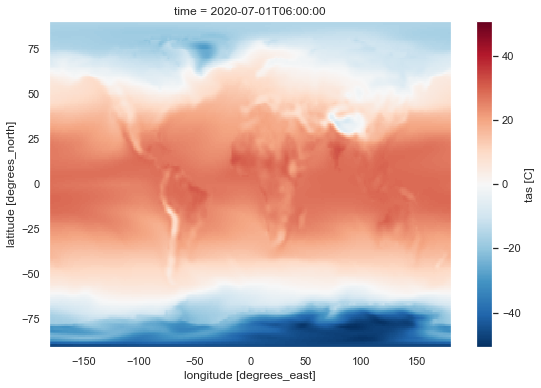

In [32]:
# have again a quick view of your variable
var3d.sel(time='2020').plot()

In [33]:
# define a time period
year_min, year_max = 1981, 2000
period = (var3d['time.year'] >= year_min) & (var3d['time.year'] <= year_max)
# average the 3d variable for this period
var2d = var3d[period].mean(axis=0)

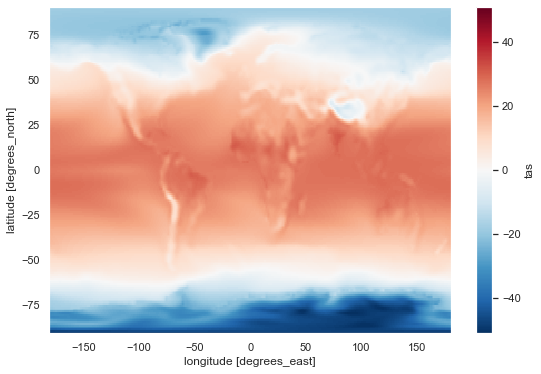

In [34]:
# have a quick look on var2d
var2d.plot()

In [35]:
var2d

<xarray.DataArray 'tas' (lat: 181, lon: 361)>
array([[-49.30093235, -49.30093235, -49.30093235, ..., -49.30093235,
        -49.30093235, -49.30093235],
       [-47.43227704, -47.41647063, -47.39992408, ..., -47.45506775,
        -47.44394968, -47.43227704],
       [-41.89309648, -41.82213421, -41.7502056 , ..., -42.02270126,
        -41.95842112, -41.89309648],
       ...,
       [-18.36648502, -18.37511045, -18.38371041, ..., -18.3487366 ,
        -18.35762267, -18.36648502],
       [-18.19535185, -18.20057111, -18.20577443, ..., -18.18407406,
        -18.18971804, -18.19535185],
       [-18.27122019, -18.27122019, -18.27122019, ..., -18.27122019,
        -18.27122019, -18.27122019]])
Coordinates:
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0

In [36]:
# mask the data over your region
mvar2d = var2d.where(region2d)

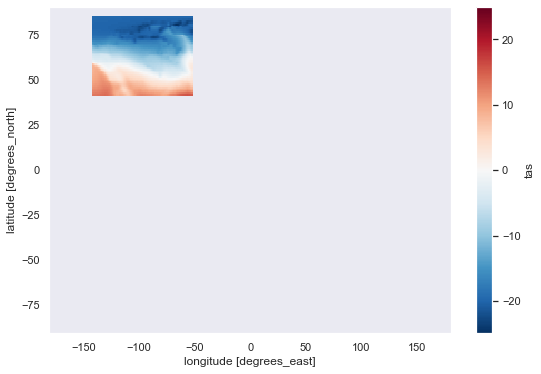

In [37]:
# have a quick look on mvar2d
mvar2d.plot()

In [38]:
# choose your colormap
cmap = 'Spectral_r'

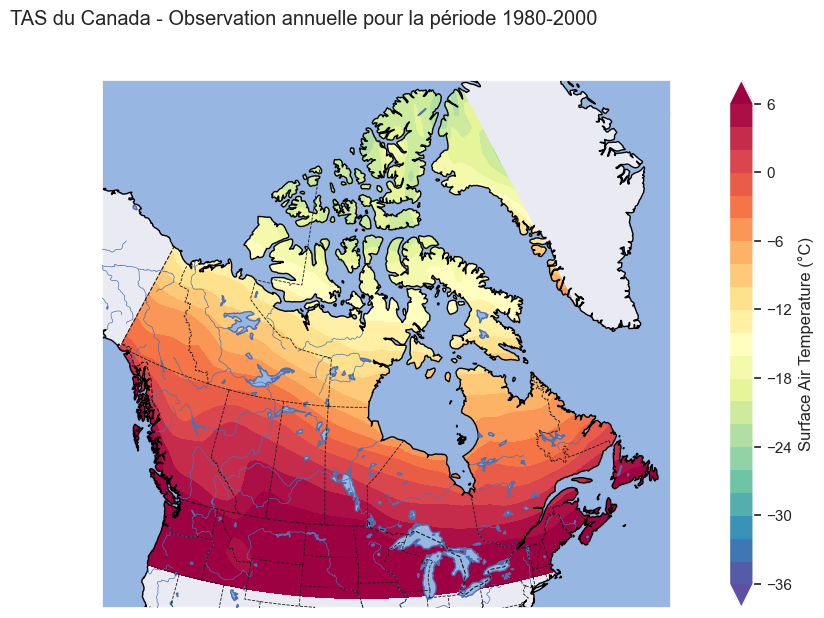

In [39]:
# plot mvar2d using your shade function, with a **nice title** and a **nice colorbar**
title = 'TAS du Canada - Observation annuelle pour la période 1980-2000'
vmin, vmax, delta = -36, 6, 2 #vmin, vmax, delta = -36, 8, 2#vmin, vmax, delta = 0, 22, 2 
shade(mvar2d, var_name='Surface Air Temperature', units='°C', title=title, vmin=vmin, vmax=vmax, delta=delta, cmap=cmap, extend='both')
# save your figure in the ./fig/ directory
fig_name = './fig/' + gcm + 'time-average' + str(year_min) + '-' + str(year_max) + '_' + season + '.png'
plt.savefig(fig_name, dpi=300)

In [40]:
# mask the data over your region
mvar3d = var3d.where(region2d)

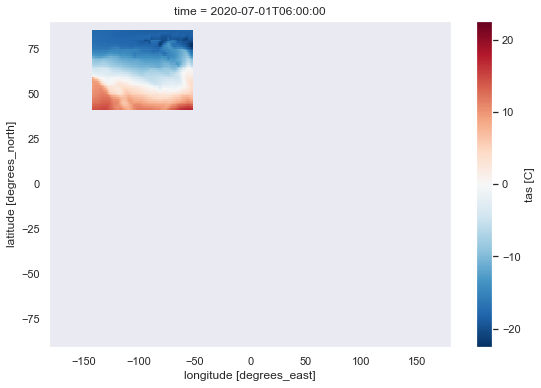

In [41]:
# have a quick look on mvar3d for one year
mvar3d.sel(time='2020').plot()

In [42]:
# define mvar2d = mvar3d for the year of your choice. Tip: use .squeeze() to remove the time dimension
year = '1980'
mvar2d = mvar3d.sel(time = year).squeeze()

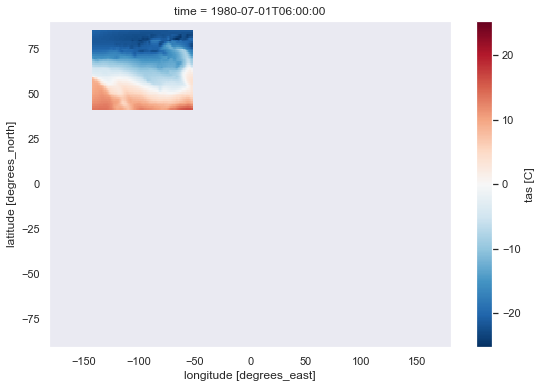

In [43]:
mvar2d.plot()

In [44]:
mvar2d

<xarray.DataArray 'tas' (lat: 181, lon: 361)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     datetime64[ns] 1980-07-01T06:00:00
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    units:    C

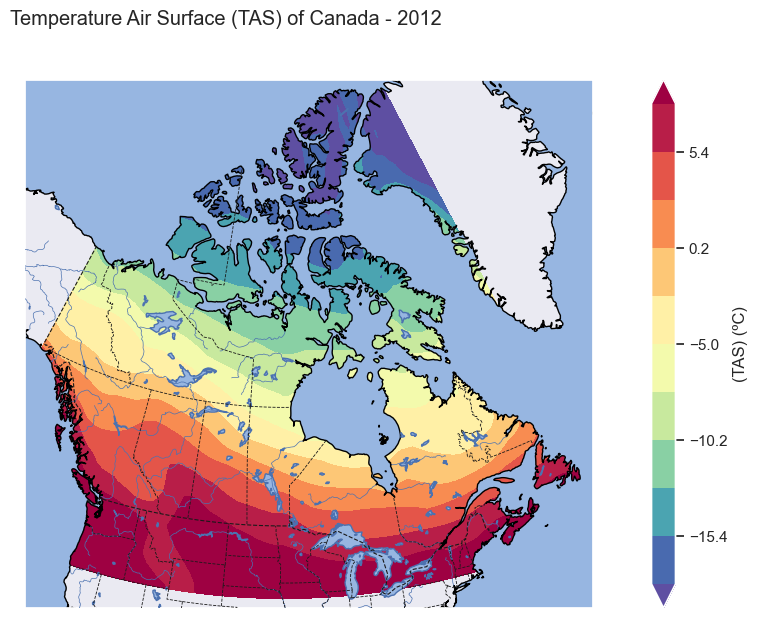

In [45]:
# plot mvar3d for the year of your choice, with a title and a nice colormap
# correction CA
year = '2012'
mvar2d = mvar3d.sel(time= year).squeeze()
title = 'Temperature Air Surface (TAS) of Canada - {0}'.format(year)
vmin, vmax, delta = - 18, 8, 2.5
shade(mvar2d, var_name = '(TAS)', units = 'ºC', title = title, vmin=vmin, vmax=vmax, delta=delta, cmap=cmap)

In [46]:
# create a weighted variable 
mvar3d_weighted = mvar3d.weighted(area2d)

In [48]:
# mvar1d = var3d, masked for your region, weighted by grid cell area, and spatially averaged
mvar1d = mvar3d_weighted.mean(("lon", "lat"))

In [49]:
# check what's in mvar1d
mvar1d

<xarray.DataArray (time: 251)>
array([-2.6268835 , -2.34040568, -2.28095208, -2.21307767, -1.27186344,
       -2.45754954, -3.01813025, -2.12869511, -2.484155  , -2.65215866,
       -2.34052115, -2.18053578, -2.57327726, -2.64472061, -2.73749527,
       -2.97703789, -2.01793028, -2.44014351, -3.36640466, -2.5049696 ,
       -1.94195035, -2.75714241, -2.54882364, -2.31831333, -2.32926275,
       -1.88984647, -2.27930124, -2.32417242, -3.2518311 , -3.53178704,
       -3.0108759 , -2.72516675, -2.76453818, -3.00386714, -2.76697257,
       -2.80207672, -3.75555103, -3.2441553 , -3.75152245, -3.31407343,
       -3.57010241, -3.87043899, -3.10258581, -2.87324272, -2.34180382,
       -1.24200499, -2.54345826, -2.64683182, -2.96839067, -2.69428972,
       -2.4340503 , -2.28986594, -2.44862951, -2.96328907, -2.69328333,
       -1.49660419, -2.52144244, -3.03518406, -3.34246889, -2.82099659,
       -2.70398555, -2.5395274 , -2.56257452, -2.81200195, -2.94732802,
       -2.84897492, -2.53369222, -2.75402348, -2.70740239, -2.90887312,
       -2.46713898, -2.28662428, -2.54638084, -2.4802077 , -2.69135958,
       -2.00241455, -2.13396969, -2.17813191, -2.82324289, -2.71779219,
       -1.78768078, -2.40588627, -2.44699599, -3.1483838 , -2.55884449,
       -2.64794322, -2.95351658, -2.51361785, -2.60525189, -2.62955308,
       -2.72612355, -3.27443546, -3.3098984 , -2.37684443, -2.76637585,
       -2.6431254 , -2.56542897, -2.29372264, -1.72598461, -2.60585683,
...
       -1.47444736, -1.49595094, -1.22340542, -1.47047945, -0.53015639,
       -1.09721818, -0.42286063, -0.99237573, -0.94970711, -0.97257192,
       -1.2378985 , -0.69727218, -0.90653056, -0.39147371, -0.5059442 ,
       -0.92640799, -0.56095517, -0.8126877 , -0.59864263, -0.59778802,
       -0.27581425, -0.4246007 ,  0.08070713,  0.61018162,  0.80411239,
       -0.20373624, -0.17535077,  0.09943778,  0.04569987,  0.77136209,
        0.56352456,  0.55346306, -0.51039217,  0.42743409,  0.41468141,
        0.45270973,  0.85483984,  1.27812727,  0.62978317,  0.65999832,
        1.17437334,  1.17290229,  1.27604535,  1.51543106,  1.14004006,
        1.58399368,  1.7335555 ,  2.32028166,  1.51168564,  2.0052919 ,
        2.33964383,  2.5661045 ,  2.607435  ,  2.80463879,  2.52646363,
        1.89570256,  2.38166008,  3.39695853,  2.94258241,  2.93422926,
        3.18826933,  2.82788761,  2.34616609,  3.11322734,  3.07840682,
        3.69230706,  3.79469828,  3.66095411,  4.01508772,  4.99086799,
        4.07285857,  4.36451407,  4.72440637,  4.11878111,  4.04839654,
        3.93097774,  4.60329886,  4.90011379,  5.43596846,  4.93732553,
        4.64950053,  5.18702302,  4.89364217,  5.11670308,  5.01203394,
        5.40437261,  5.33419428,  4.9479281 ,  5.40388329,  5.82681029,
        5.36969895,  6.00026645,  6.48268985,  5.98904402,  5.75849438,
        6.37723097])
Coordinates:
  * time     (time) datetime64[ns] 1850-07-01T06:00:00 ... 2100-07-01T06:00:00

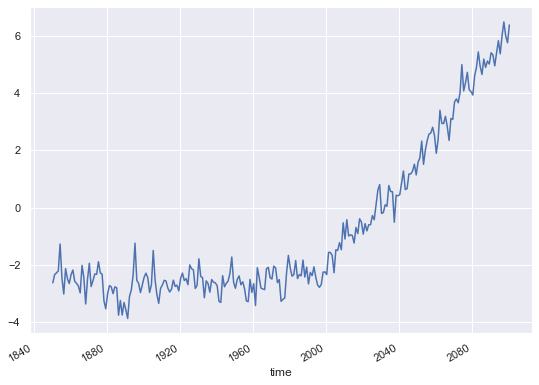

In [50]:
# plot quickly what's in mvar1d
mvar1d.plot()

In [51]:
import cftime
import datetime

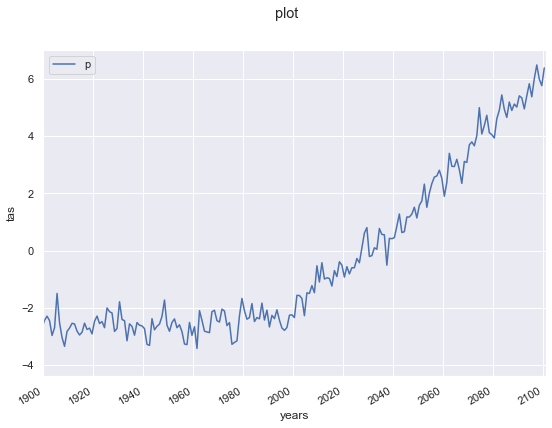

In [52]:
title = 'plot'
mvar1d.plot(label=season)
plt.legend('plot')
plt.suptitle(title)
plt.xlabel('years'), plt.ylabel('tas')
xmin, xmax = datetime.datetime(1900, 1, 1), datetime.datetime(2100, 12, 31)
#xmin, xmax = cftime.DatimetimenoLeap(1900, 1, 1, 0, 0, 0, 0), cftime.DatimetimenoLeap(2100, 12, 31, 6, 0, 0, 0)
#ymin, ymax = -30, 30
plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
# save your figure in the ./fig/ directory
fig_name = './fig/' + gcm + '_spatial-average_' + season + '.png'
plt.savefig(fig_name, dpi=300)

In [53]:
mvar1d;

In [54]:
# reference period : 1980-2000
year_min = 1980
year_max = 2000
period_ref = (mvar1d['time.year'] >= year_min) & (mvar1d['time.year'] <= year_max)
# time mean and standard deviation for this period
mean_ref = mvar1d[period].mean(axis=0)
std_ref = mvar1d[period].std(axis=0)

In [55]:
mean_ref

<xarray.DataArray ()>
array(-2.34665602)

Text(0.5, 0.98, 'Variabilité interne du Canada pour le période 1980 - 2000')

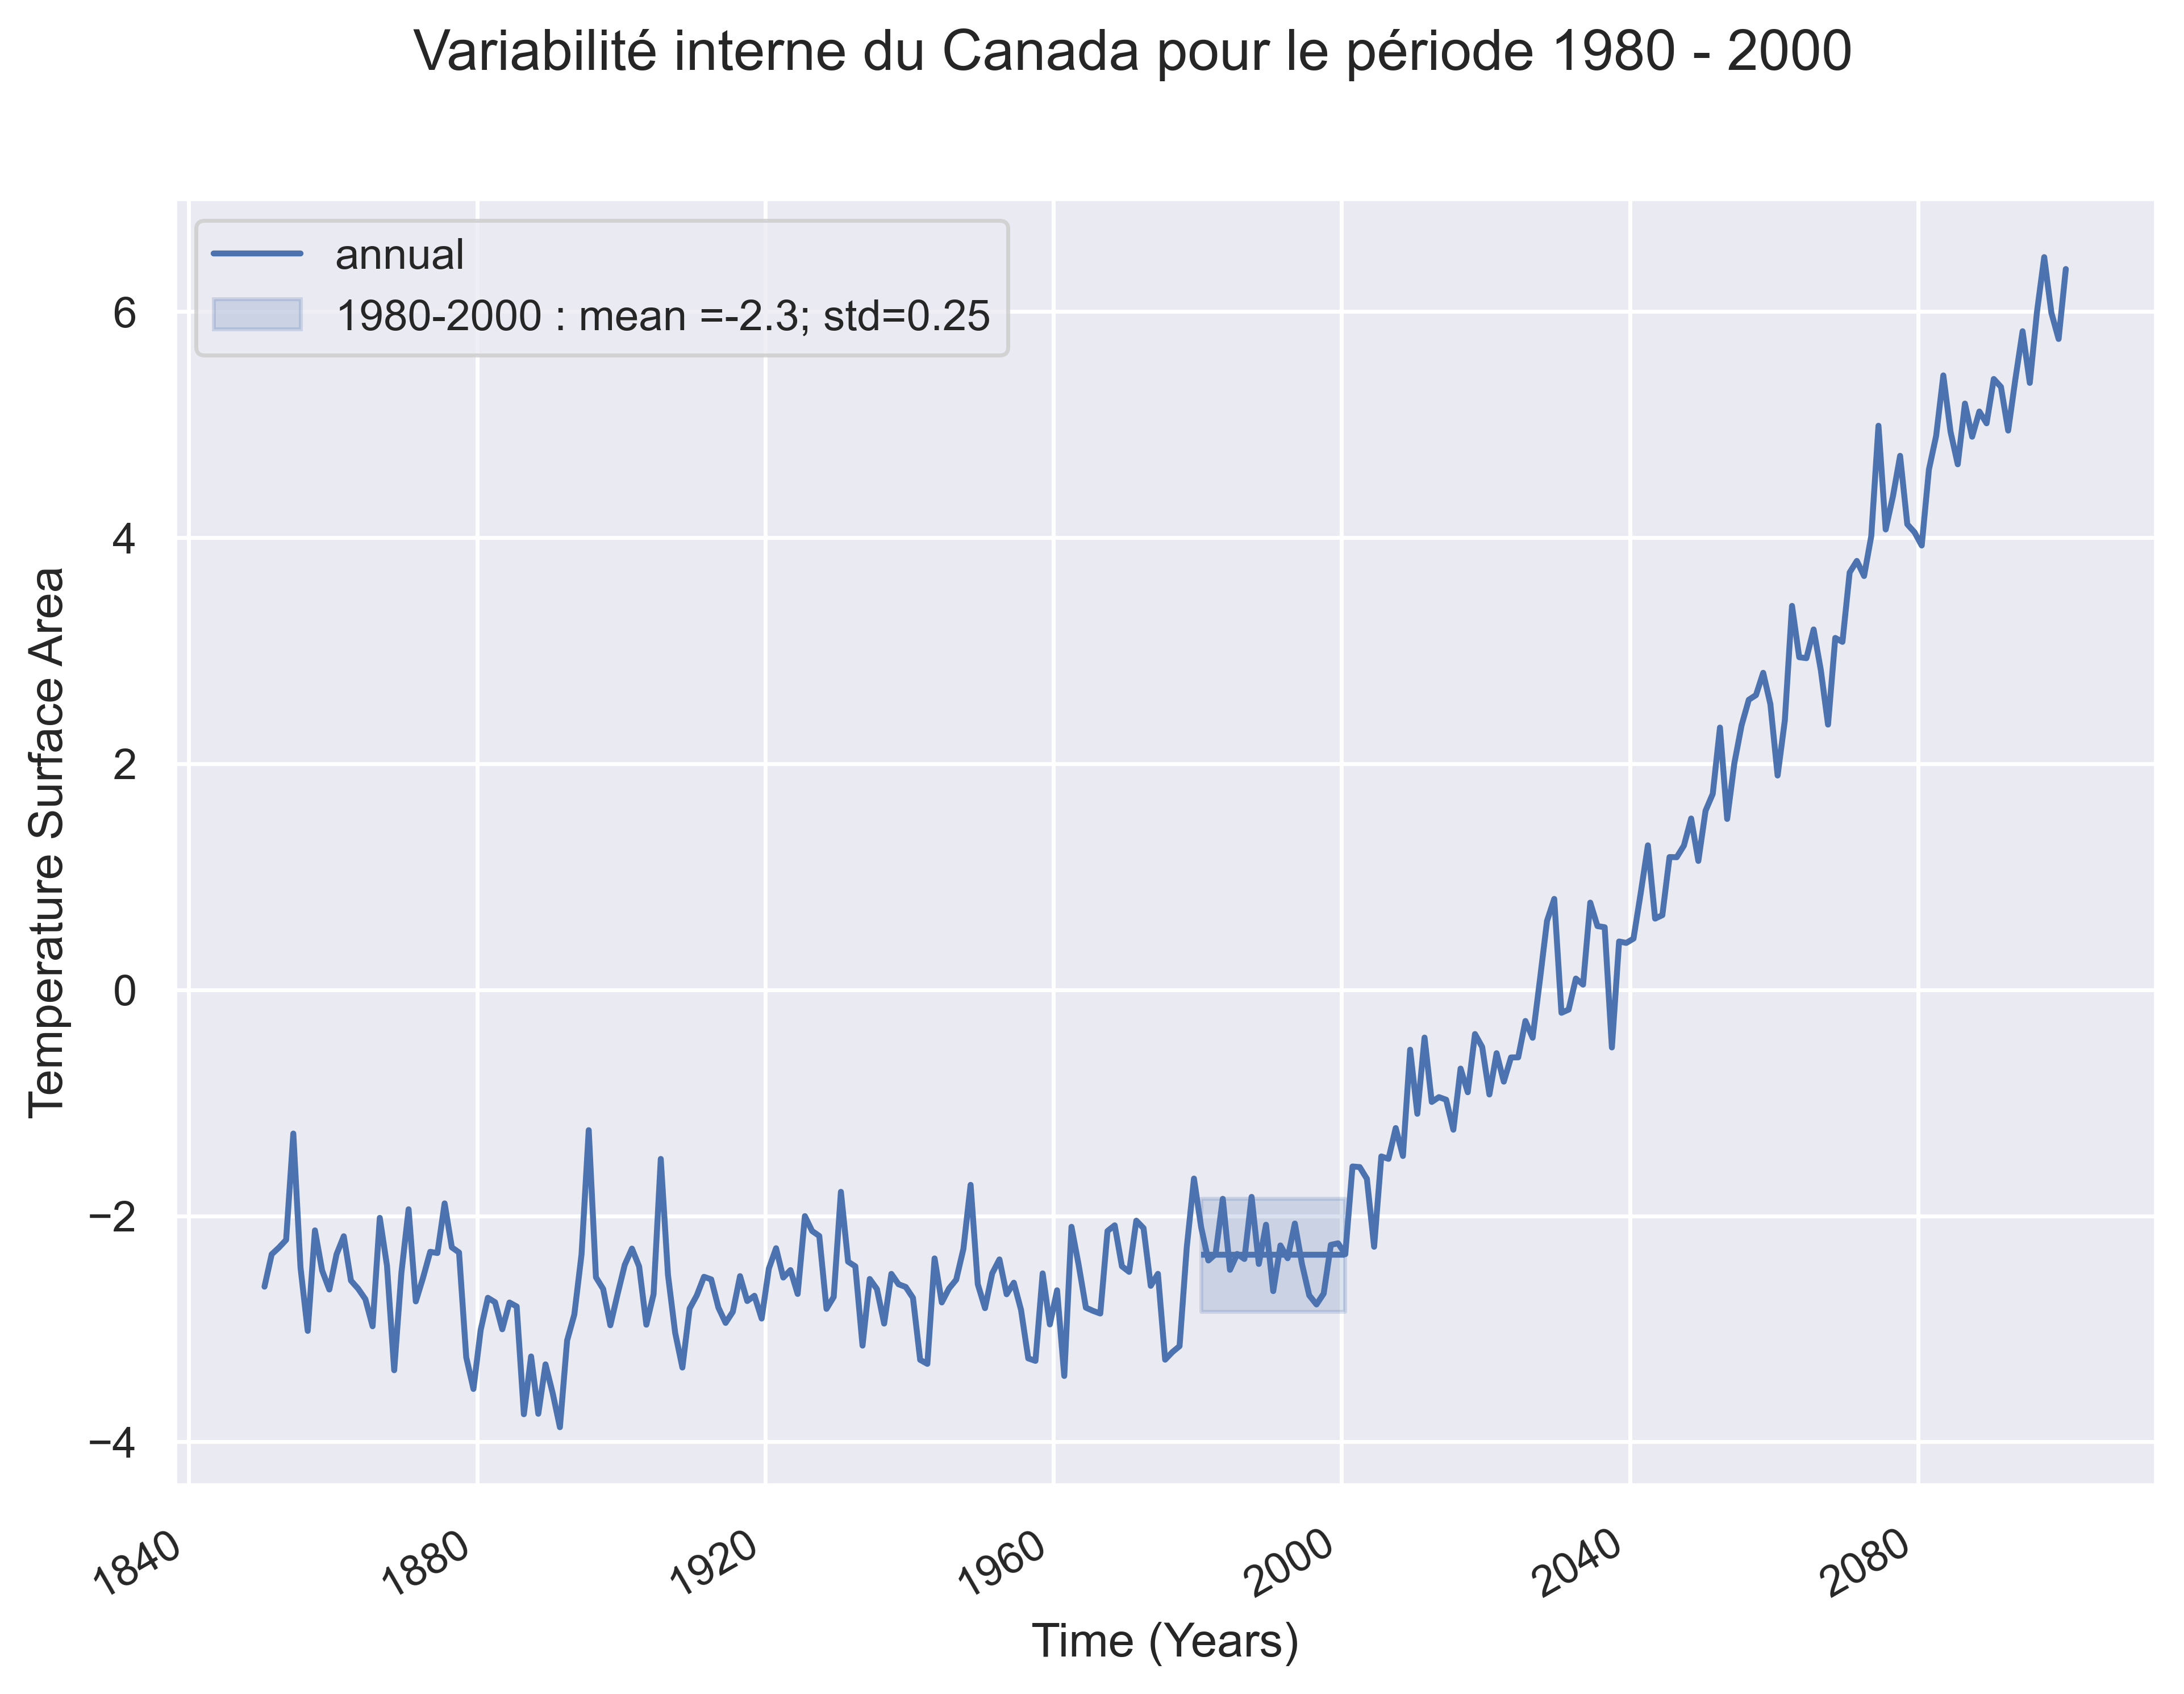

In [56]:
plt.figure(dpi=500)
# a nice figure : add title, axes and labels
title = 'Variabilité interne du Canada pour le période {0} - {1}'.format(year_min, year_max)
# plot the time series
mvar1d.plot(label=season)
# transform year in date
date_min, date_max = datetime.datetime(year_min,6,15), datetime.datetime(year_max,6,15)
# plot the mean over the period with an horizontal line
plt.hlines(mean_ref, date_min, date_max, colors='b')
# shade 2 std around the mean
min_val, max_val = mean_ref - 2*std_ref, mean_ref + 2*std_ref
label = str(year_min) + '-' + str(year_max) + ' : mean =' + str(np.round(mean_ref.values, 1)) + '; std=' + str(np.round(std_ref.values,2))
plt.fill_between([date_min, date_max], [min_val, min_val], [max_val, max_val], color='b', alpha=0.2, label=label)
plt.xlabel('Time (Years)')
plt.ylabel('Temperature Surface Area')
plt.legend()
plt.suptitle(title)

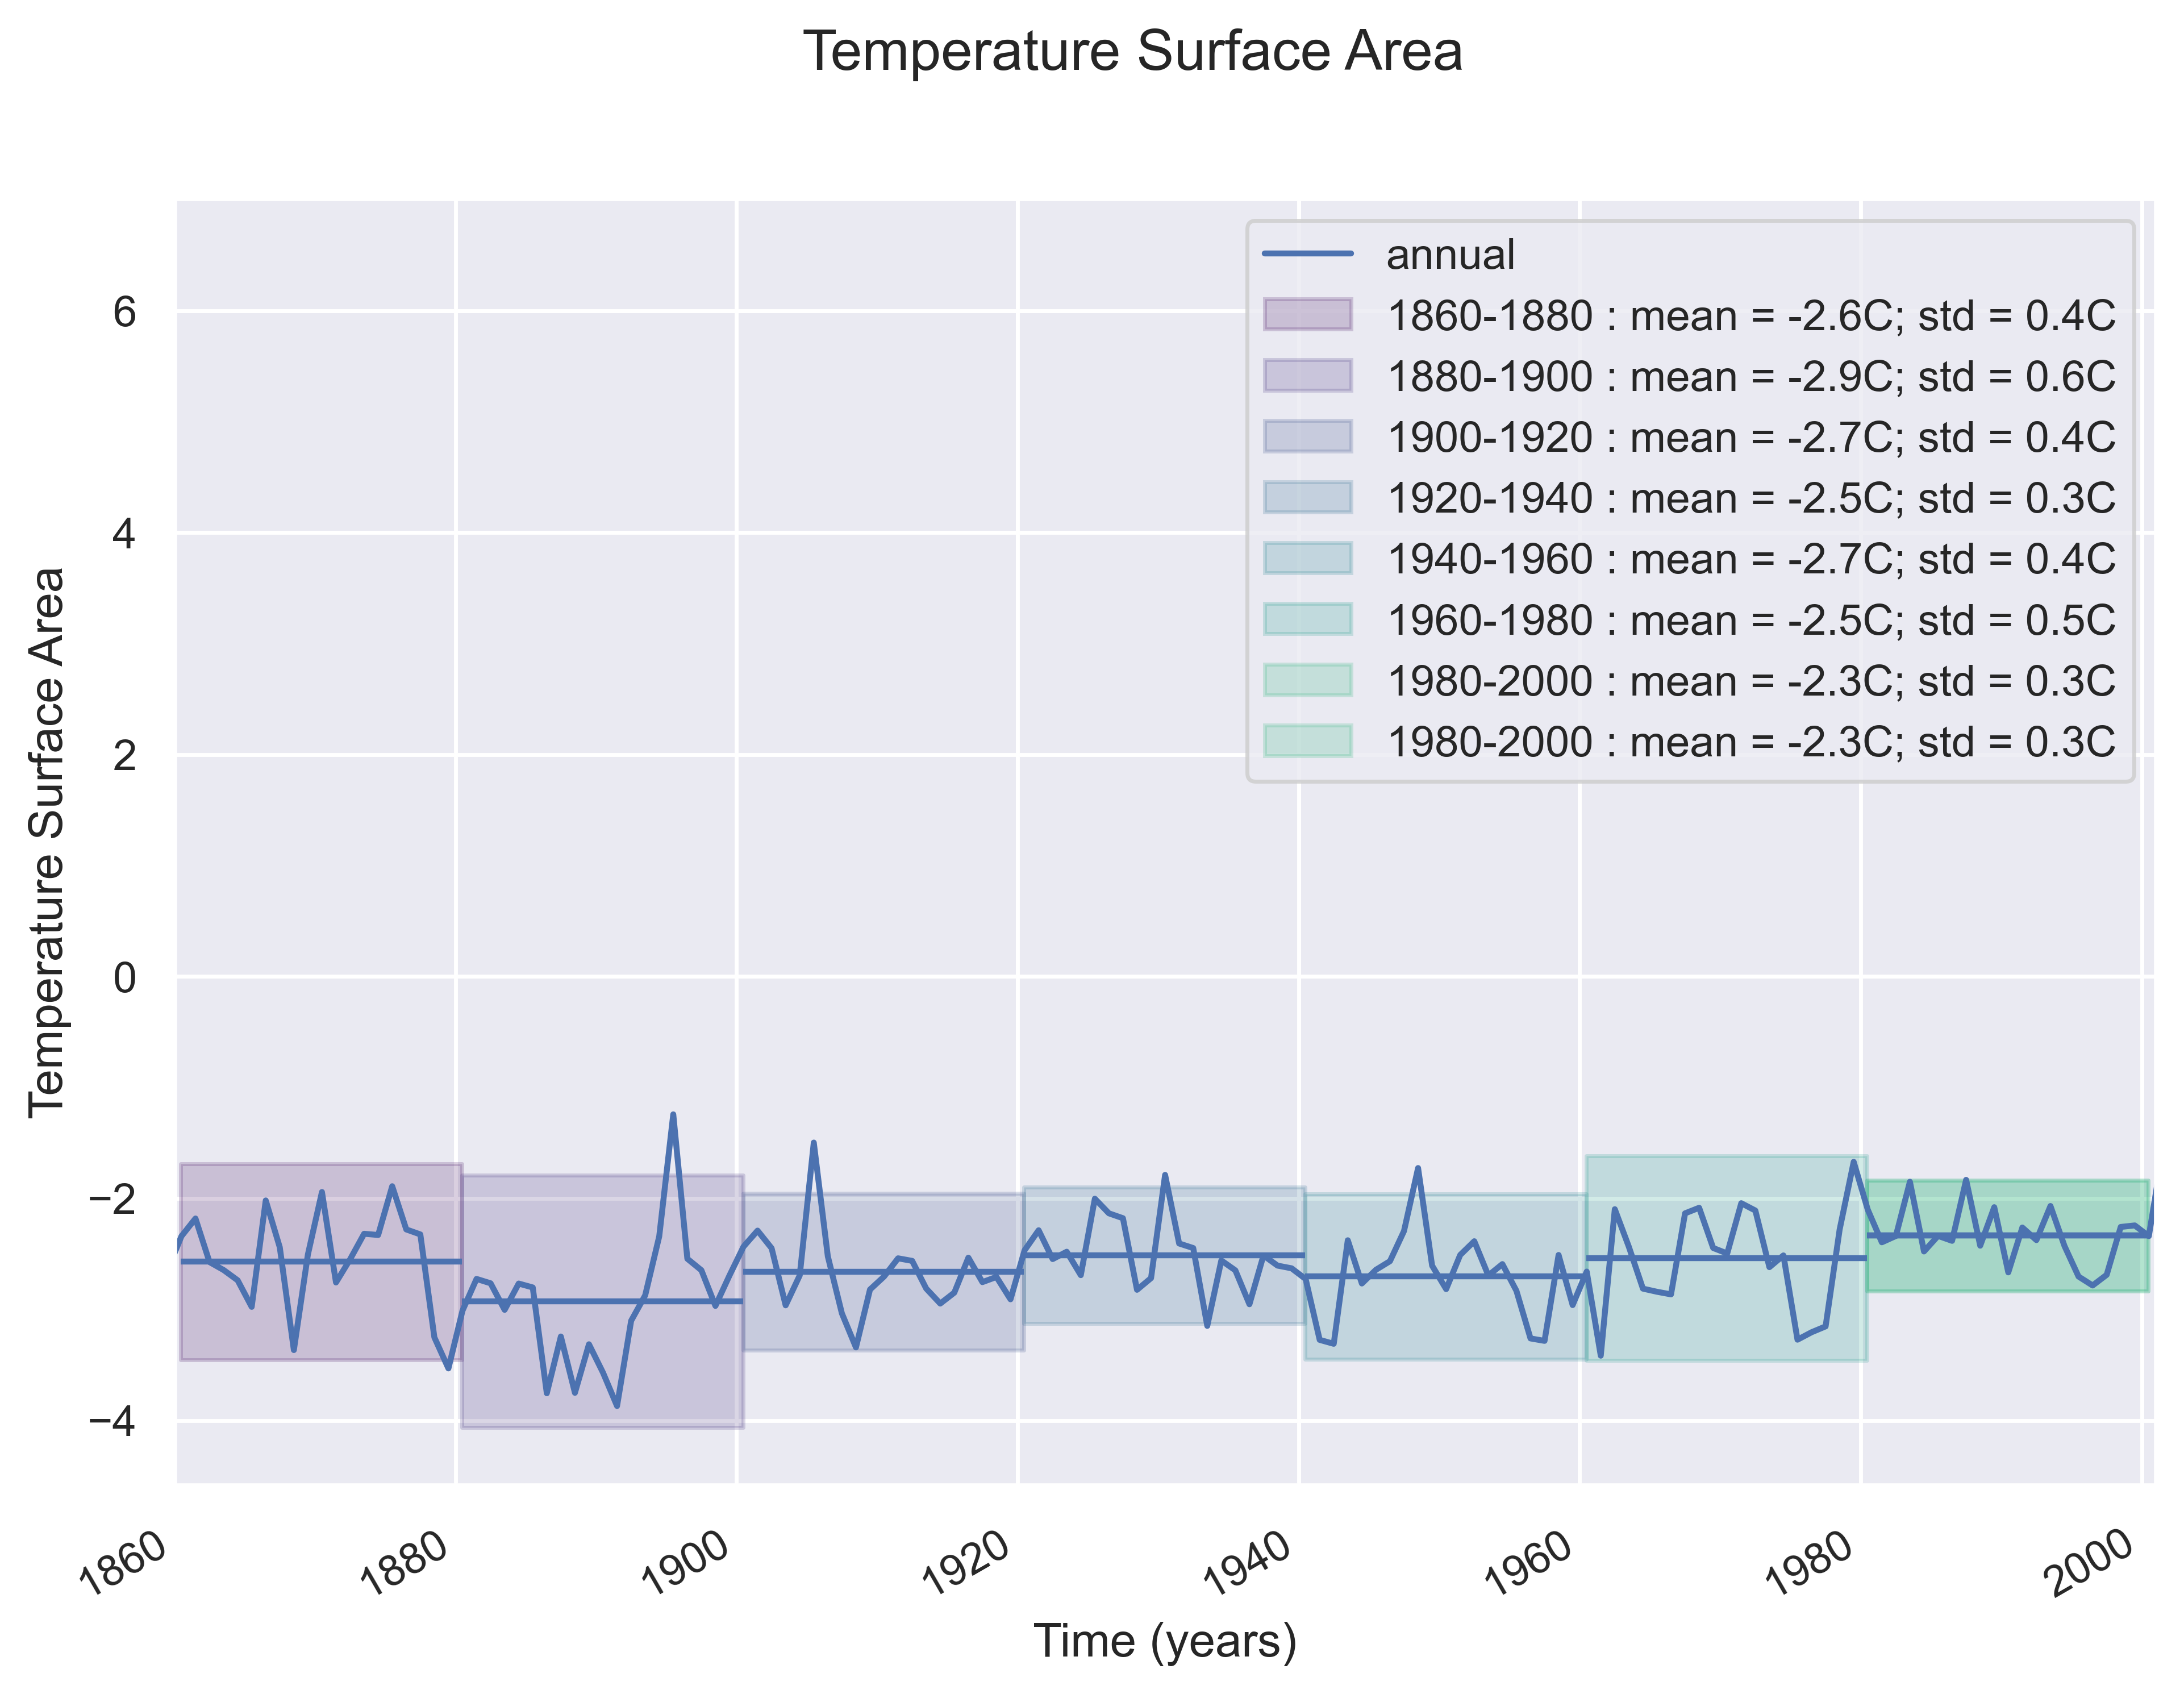

In [62]:
def compute_time_mean_std(mvar1d, year_min, year_max):
    '''
    The time mean and std of the variable mvar1d for the period between year_min and year_max
    Parameters
    ----------
    mvar2d: np.array or xarray
        2-dimensional
    year_min: integer
        first year of the period
    year_max: integer
        last year of the period
    Returns
    -------
    real, real
        time mean, time std
    '''
    period = (mvar1d['time.year'] >= year_min) & (mvar1d['time.year'] <= year_max)
    # mean and standard deviation for this period
    tmean = mvar1d[period].mean("time")
    tstd = mvar1d[period].std("time")
    return tmean.values, tstd.values


def show_time_mean_std(mvar1d, year_min, year_max):
    '''
    Plot a box representing the mean and temporal variability over the period between year_min and year_max
    Parameters
    ----------
    mvar2d: np.array or xarray
        2-dimensional
    year_min: integer
        first year of the period
    year_max: integer
        last year of the period
    Returns
    -------
    real, real
        time mean, time std
    '''
    # transform year in date
    date_min, date_max = datetime.datetime(year_min,6,15), datetime.datetime(year_max,6,15)
    # compute the mean, the std and the bounds
    tmean, tstd = compute_time_mean_std(mvar1d, year_min, year_max)
    tmin, tmax = tmean - 2 * tstd, tmean + 2 * tstd
    # plot
    # select a color depending of the year
    color = plt.get_cmap('viridis')((year_min - 1850) / 200)
    # label of the period
    label = str(year_min) + '-' + str(year_max) + ' : mean = ' + str(np.round(tmean, 1)) + units[var_name] + \
            '; std = '+str(np.round(tstd, 1)) + units[var_name]
    # plot the mean over the period
    plt.hlines(tmean, date_min, date_max, colors='b')
    # shade 2 std around the mean
    plt.fill_between([date_min, date_max], [tmin, tmin], [tmax, tmax], color=color, alpha=0.2, label=label)
    return tmean, tstd


# a nice figure : add title, axes and labels

plt.figure(dpi=500)

title = 'Temperature Surface Area'
mvar1d.plot(label=season)
for year_min in np.arange(1860, 2000, 20):
    show_time_mean_std(mvar1d, year_min, year_min + 20)
xmin, xmax = datetime.datetime(1860, 1, 1), datetime.datetime(2000, 12, 31)
# ymin, ymax = ...
plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
# test your reference period and modify it
# ========================================
year_min = 1980
year_max = 2000
show_time_mean_std(mvar1d, year_min, year_max)
plt.xlabel('Time (years)')
plt.ylabel('Temperature Surface Area')
plt.legend()
plt.suptitle(title)
# save your figure in the ./fig/ directory
fig_name = './fig/' + gcm + '_spatial-average_boxes_' + season + '.png'
plt.savefig(fig_name, dpi=300)

In [63]:
# define your final year_min, year_max for your reference period
year_min = 1980
year_max = 2000
mean_ref, std_ref = compute_time_mean_std(mvar1d, year_min, year_max)

In [65]:
# define the condition of emergence
emergence = mvar1d > mean_ref + 2*std_ref

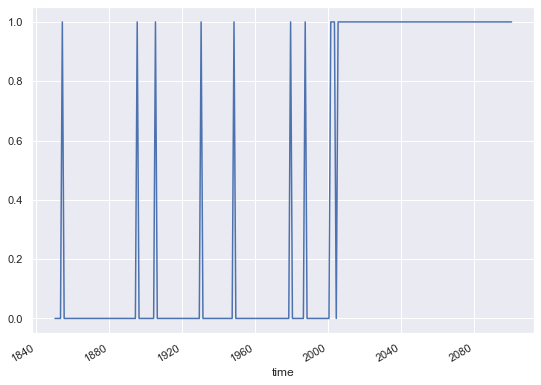

In [66]:
# have a quick look on emergence
emergence.plot()

In [67]:
# find the year toe for which all the folling years verify the condition of emergence
status = 0

for i in range(len(emergence)):
    if status == 0:
        if emergence[i] == True:
            toe = emergence['time.year'][i]
            status = 1
    else: 
        if emergence[i] == True:
            status = 1
        else:
            status = 0

print('The time of emergence for ' + gcm + ' is: ' + str(toe))

The time of emergence for ACCESS1-3 is: <xarray.DataArray 'year' ()>
array(2005)
Coordinates:
    time     datetime64[ns] 2005-07-01T06:00:00


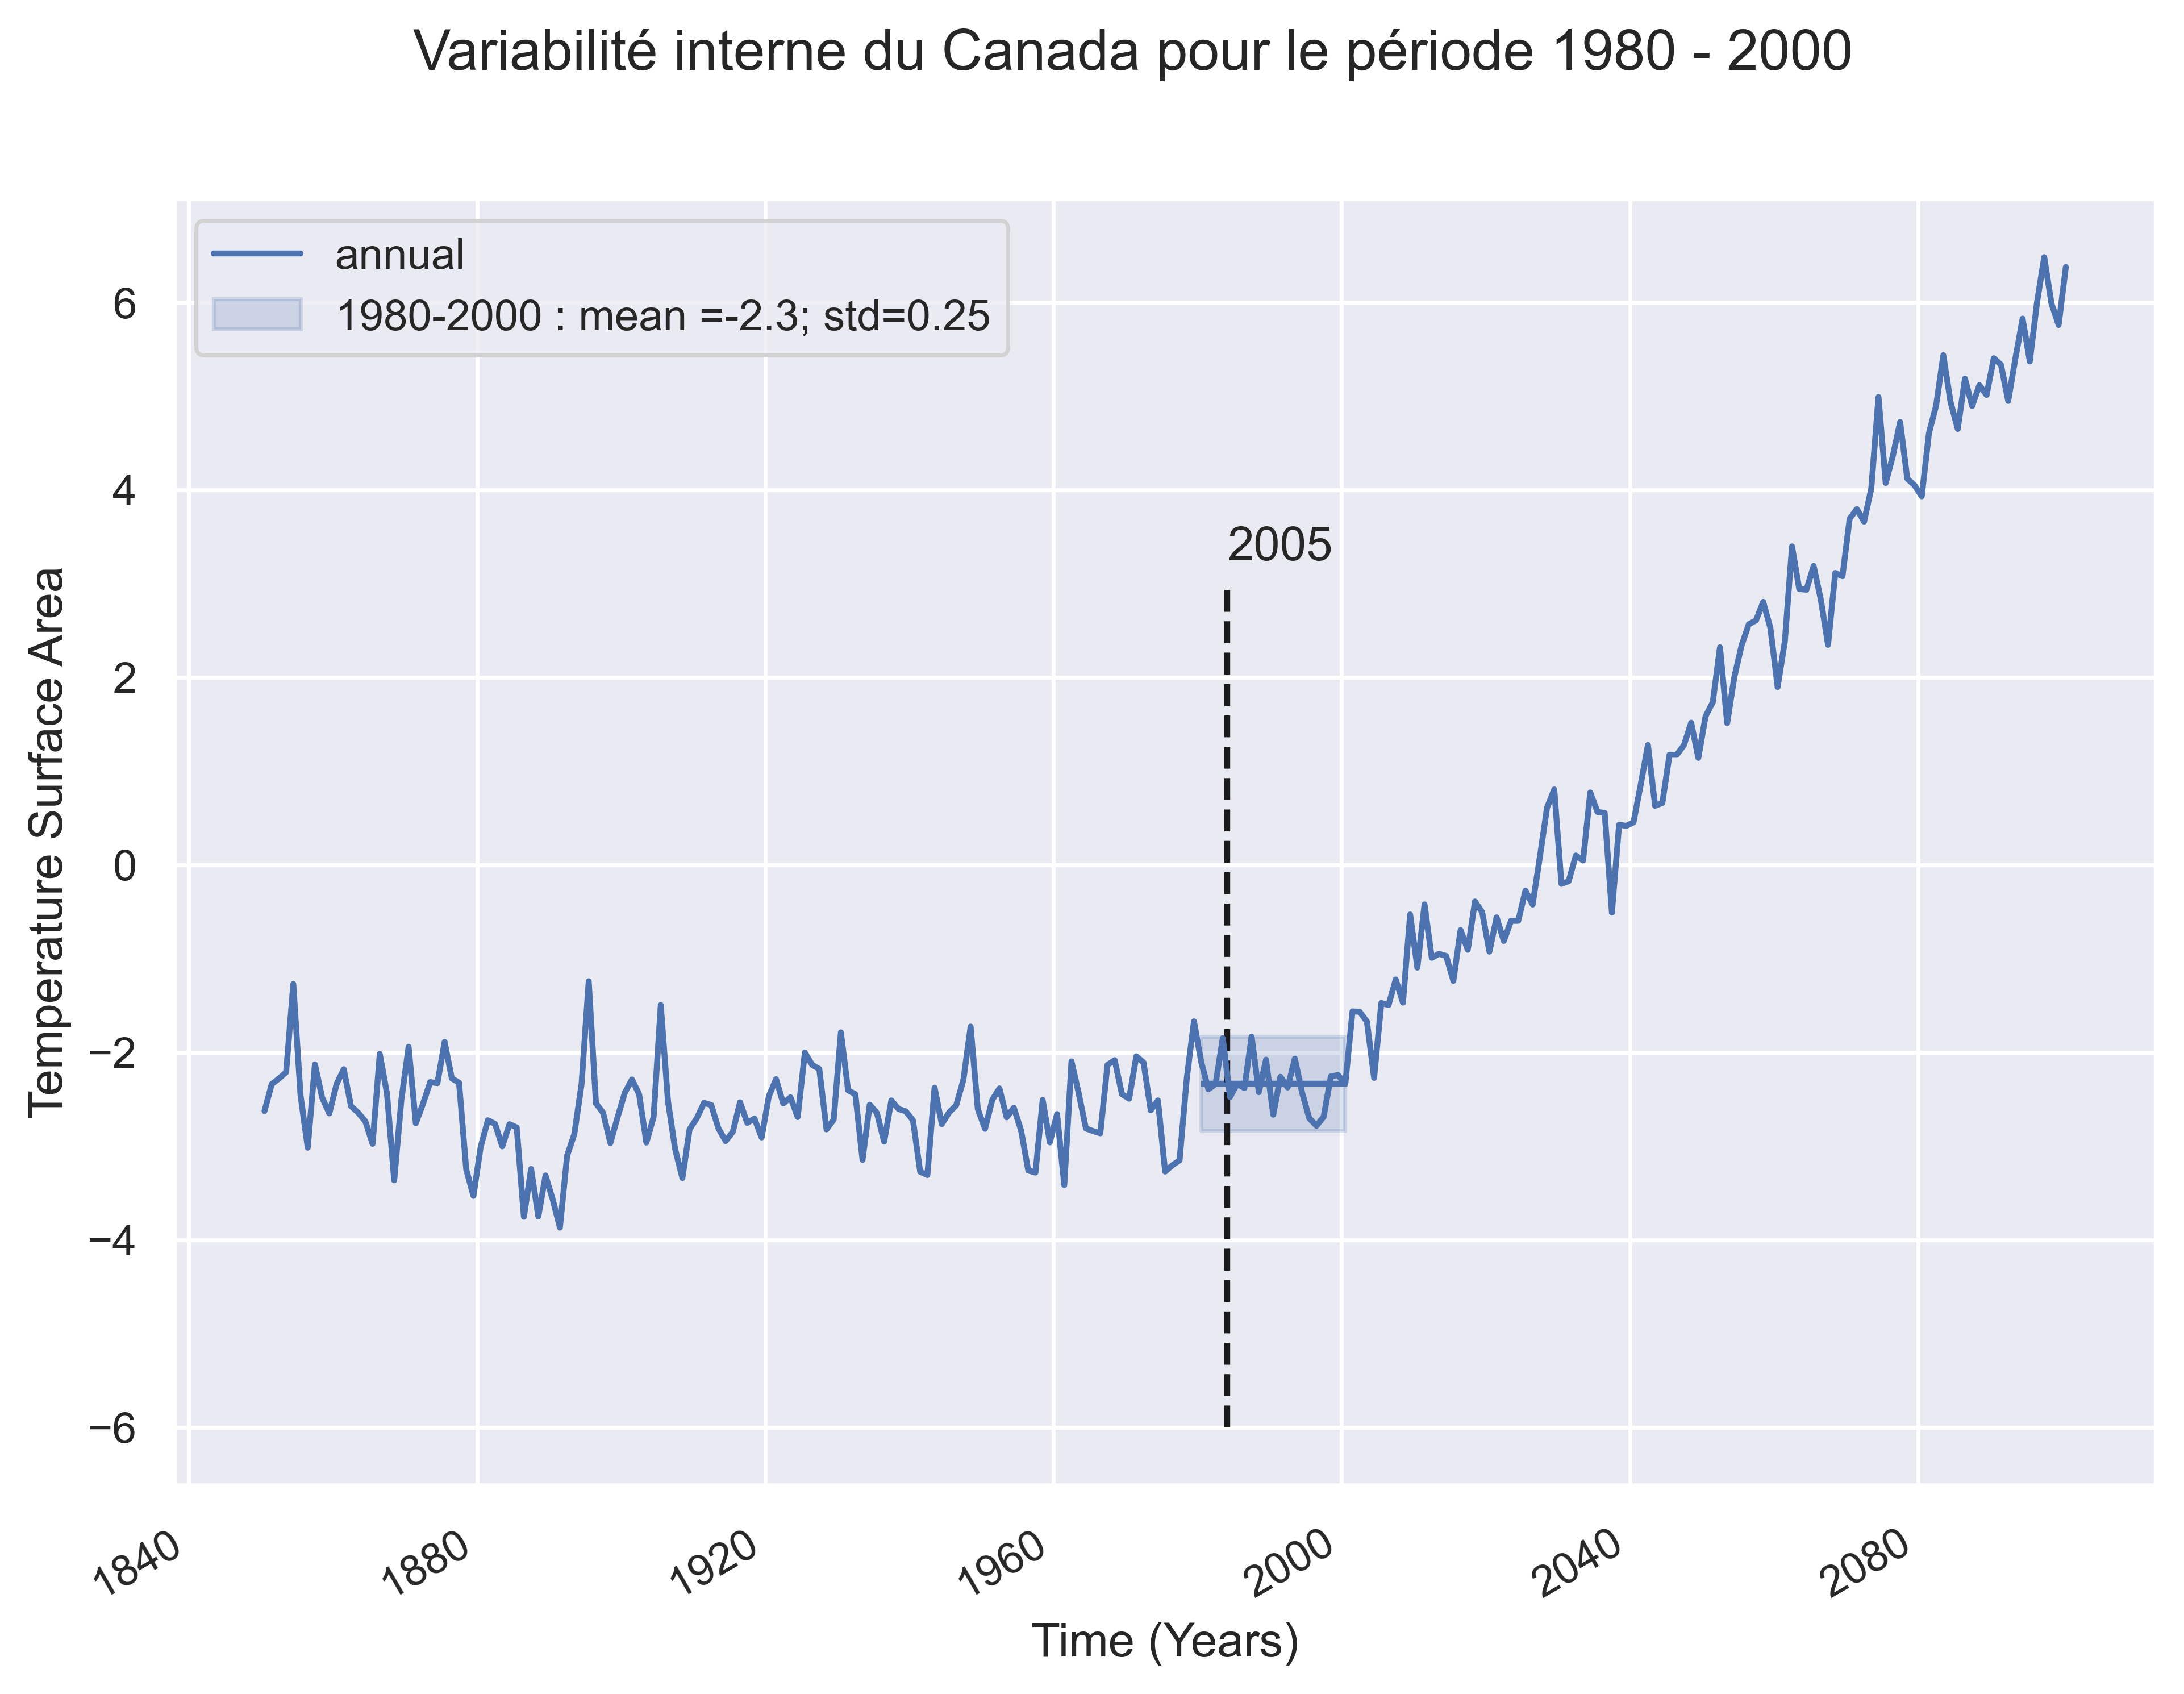

In [71]:
# a nice figure : add title, axes and labels
plt.figure(dpi=500)
# a nice figure : add title, axes and labels
title = 'Variabilité interne du Canada pour le période {0} - {1}'.format(year_min, year_max)
# plot the time series
mvar1d.plot(label=season)
# transform year in date
date_min, date_max = datetime.datetime(year_min,6,15), datetime.datetime(year_max,6,15)
# plot the mean over the period with an horizontal line
plt.hlines(mean_ref, date_min, date_max, colors='b')
# shade 2 std around the mean
min_val, max_val = mean_ref - 2*std_ref, mean_ref + 2*std_ref
#label = str(year_min) + '-' + str(year_max) + ' : mean =' + str(np.round(mean_ref.values, 1)) + '; std=' + str(np.round(std_ref.values,2))
plt.fill_between([date_min, date_max], [min_val, min_val], [max_val, max_val], color='b', alpha=0.2, label=label)
plt.xlabel('Time (Years)')
plt.ylabel('Temperature Surface Area')
plt.legend()
plt.suptitle(title)

#... plus graphical representation of the time of emergence ...
plt.vlines(5162.5,-6,3,colors=None,linestyles='dashed',label='time of emergence',data=None,color='k')
plt.annotate(np.array(toe),(5162.5,3.25))
#plt.axvline(toe.values) (??)
# save your figure in the ./fig/ directory
fig_name = './fig/' + gcm + '_spatial-average_toe_' + season + '.png'
plt.savefig(fig_name, dpi=300)